In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
#Download of dataset : https://datahub.io/zelima1/finance-vix
df = pd.read_csv('D:/finance-vix.txt',
                sep=',',
                infer_datetime_format=True,
                index_col=False)
df.fillna(0, inplace=True)
#Drop date from dataset
df.drop('Date', axis=1, inplace=True)

print(df.head())
print(df.describe())

   VIX Open  VIX High  VIX Low  VIX Close
0     17.96     18.68    17.54      18.22
1     18.45     18.49    17.44      17.49
2     17.66     17.67    16.19      16.73
3     16.72     16.75    15.50      15.50
4     15.42     15.68    15.32      15.61
          VIX Open     VIX High      VIX Low    VIX Close
count  3725.000000  3725.000000  3725.000000  3725.000000
mean     18.457289    19.301055    17.611780    18.357952
std       8.879643     9.465319     8.269978     8.844818
min       9.010000     9.310000     8.560000     9.140000
25%      13.010000    13.470000    12.540000    12.910000
50%      15.720000    16.440000    15.070000    15.600000
75%      20.900000    21.910000    19.890000    20.790000
max      80.740000    89.530000    72.760000    80.860000


In [4]:
#Here we need to specify Features and Label (split dataset into features and target (VIX Close))
X = df.drop("VIX Close", axis=1)
Y = df["VIX Close"]

#Split dataset to train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=40)

print('X_train shape is :', X_train.shape)
print('Y_train shape is :', Y_train.shape)
print('X_test shape is :', X_test.shape)
print('Y_test shape is :', Y_test.shape)

X_train shape is : (2980, 3)
Y_train shape is : (2980,)
X_test shape is : (745, 3)
Y_test shape is : (745,)


In [5]:
#Scale our data to prevent failing the model
scaler = StandardScaler()
scaler.fit(X_train)

Xtrain_scaled = scaler.transform(X_train)
Xtest_scaled = scaler.transform(X_test)

# Set Neural Network

In [6]:
#In this case, we do not need convolutuonal layer as there are one dimension, while in image we have two dimensions
model = Sequential()
model.add(Dense(128, input_dim=3, activation='relu'))
model.add(Dense(64, activation='relu'))
#Output layer
model.add(Dense(1,  activation='linear'))
#Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()
#Fit the model
history = model.fit(Xtrain_scaled, Y_train, epochs=100, validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 8,833
Trainable params: 8,833
Non-trainable params: 0
_________________________________________________________________

Train on 2384 samples, validate on 596 samples
Epoch 1/100
2384/2384 [==============================] - 0s 142us/step - loss: 277.8889 - mae: 14.5880 - val_loss: 80.4804 - val_mae: 7.5101
Epoch 2/100
2384/2384 [==============================] - 0s 76us/step - loss: 45.1696 - mae: 5.5803 - val_loss: 18.9438 - val_mae: 3.5378
Epoch 3/100
2384/2384 [==============================] 

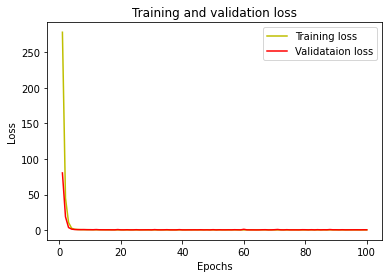

In [7]:
#Plotting training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validataion loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

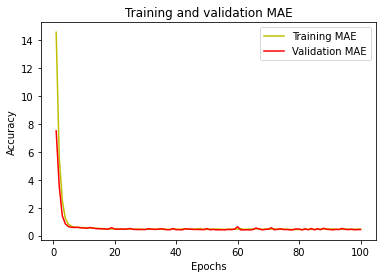

In [8]:
acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [9]:
#Predict the model using test data
pred = model.predict(Xtest_scaled[:10])
print('Predicted values are {}'.format(pred))
print('Real Values are {}'.format(Y_test[:10]))

Predicted values are [[12.316861]
 [29.846092]
 [52.868774]
 [17.923227]
 [57.38941 ]
 [12.244268]
 [13.206843]
 [ 9.88486 ]
 [11.491477]
 [24.516312]]
Real Values are 3192    11.94
3547    37.32
1198    52.05
1108    18.14
1247    56.76
740     12.07
2522    12.89
3515     9.53
396     11.57
1442    24.95
Name: VIX Close, dtype: float64


In [10]:
#Comparison with other models 
#mse = mean squared error, 
#mae = mean absolute error
mse_neural, mae_neural = model.evaluate(Xtest_scaled, Y_test)
print('Mean Squared Error from neural net: {}'.format(mse_neural))
print('Mean Absolute Error from neural net: {}'.format(mae_neural))

745/745 [==============================] - 0s 35us/step
Mean Squared Error from neural net: 0.47300801405170617
Mean Absolute Error from neural net: 0.4169711768627167
